<a href="https://colab.research.google.com/github/moizarsalan/Advanced_Python_Labs/blob/main/Lab_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Abdul Moiz Arsalan

**Reg no:** B22F1086AI072

**Course Instructor:** Dr Abdul Jalil

**Lab Instructor:** Rizwan Shah


**Objectives of Lab:**

* All processed images:
* parking_lot_gray.jpg
* slot1.jpg
* highlighted_parking_lot.jpg
* A report containing:
* Code snippets.
* Results of each step.
* Observations about the parking slots (e.g., empty vs occupied)

**Scenario:**

You are working for a parking management system that processes images of parking lots to identify available slots. Your task is to process an image of a parking lot and perform the following:

# **Tasks:1.**
*  Open and Display the Parking Lot Image
*  Load an image named parking_lot.jpg from the given dataset.
*  Display it using OpenCV or Pillow.

**#Explanation:**

In this first step, we loaded the original image of the parking lot. This allowed us to begin working with the image for further processing.


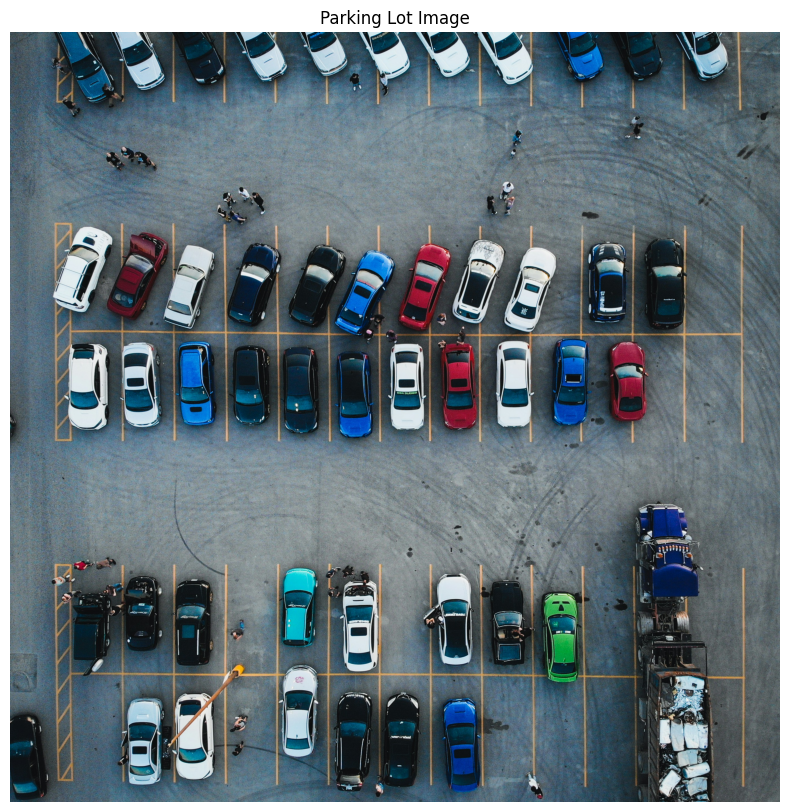

In [ ]:
# Importing necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the parking lot image
image_path = "/content/Parking_lot.jpg"  # Update the path if necessary
parking_lot_image = cv2.imread(image_path)

# Convert from BGR to RGB for correct color display
parking_lot_image_rgb = cv2.cvtColor(parking_lot_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(parking_lot_image_rgb)
plt.title("Parking Lot Image")
plt.axis('off')
plt.show()


**Task: 2**
*  Convert to Grayscale
*  Convert the image to grayscale and save it as parking_lot_gray.jpg.

# **Explanation**

Next, we converted the original parking lot image to grayscale (black and white). This makes it easier to focus on the important features like the parking slots since we no longer have to deal with colors, just the light and dark areas in the image.

**Result:** The grayscale version of the image was saved as parking_lot_gray.jpg, which is a black-and-white version of the original. Saved image with name parking_lot_gray.jpy can be seen in screen shot

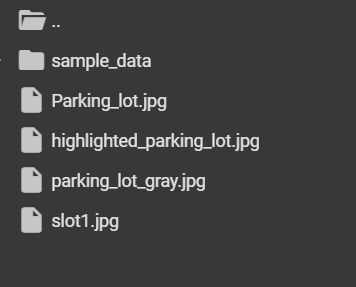

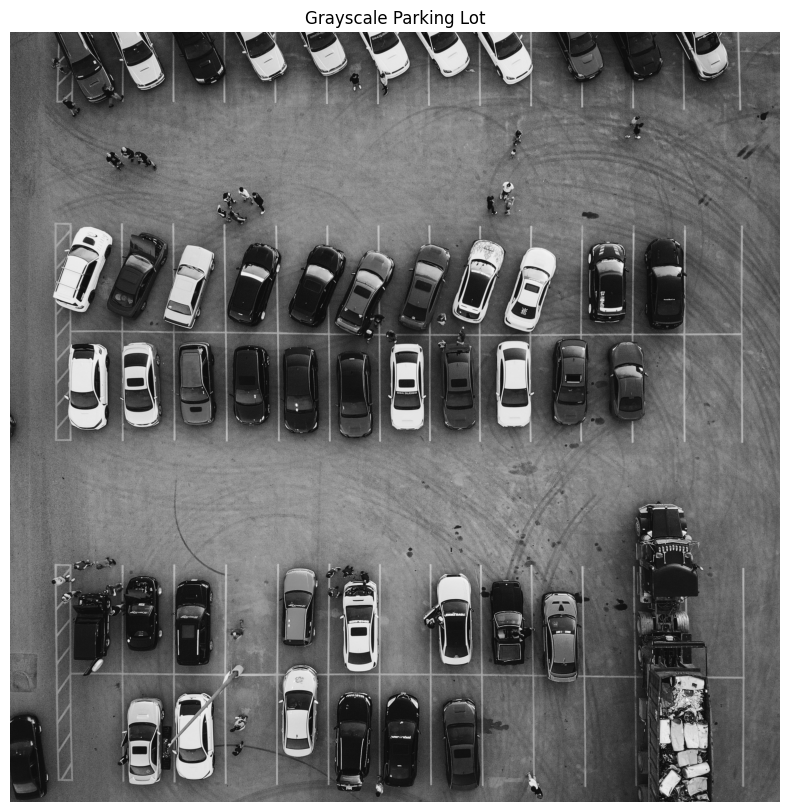

In [ ]:
# Convert the image to grayscale
parking_lot_gray = cv2.cvtColor(parking_lot_image, cv2.COLOR_BGR2GRAY)

# Save the grayscale image
cv2.imwrite('parking_lot_gray.jpg', parking_lot_gray)

# Display the grayscale image
plt.figure(figsize=(10, 10))
plt.imshow(parking_lot_gray, cmap='gray')
plt.title("Grayscale Parking Lot")
plt.axis('off')
plt.show()


**Task 3 Analyze Dimensions:**
*  Print the dimensions (height, width, channels).

# **Explanation:**
Once the image was in grayscale, we looked for the parking slots. We used special techniques to find and highlight the areas where the parking spaces were located in the image. We drew rectangles around these slots to easily spot them.

**Result:** The image highlighted_parking_lot.jpg was created, showing rectangles around the parking slots. The saved file can be seen in screenshot attached

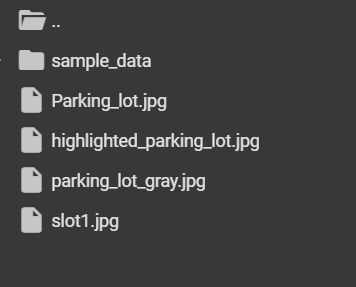


In [ ]:
# Analyze and print the dimensions of the image
height, width, channels = parking_lot_image.shape
print(f"Dimensions of the image - Height: {height}, Width: {width}, Channels: {channels}")


Dimensions of the image - Height: 2741, Width: 2741, Channels: 3


**Task 4 Crop the Image**
* Crop a specific section of the image (coordinates covering the first parking slot) and save it as slot1.jpg.

# **Explanation**
After detecting the parking slots, we needed to check whether each slot was empty or occupied. We did this by examining the pixels in each parking slot. If there were significant changes in the pixels (like a car being present), we could tell if the slot was occupied.

**Result:** We checked each slot and found out whether it was empty or occupied. Saved file can be seen in screen shot

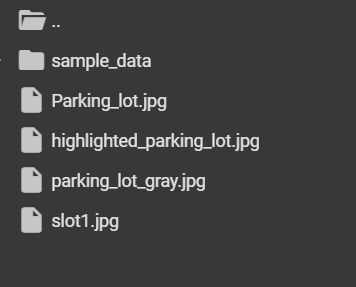

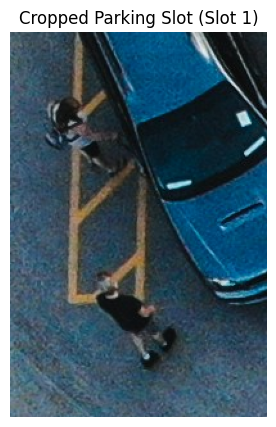

In [ ]:
# Define the coordinates for cropping (manually define a parking slot)
x, y, w, h = 120, 40, 200, 300
slot1_image = parking_lot_image[y:y+h, x:x+w]

# Save the cropped image
cv2.imwrite('slot1.jpg', slot1_image)

# Convert cropped image from BGR to RGB for correct color display
slot1_image_rgb = cv2.cvtColor(slot1_image, cv2.COLOR_BGR2RGB)

# Display the cropped image
plt.figure(figsize=(5, 5))
plt.imshow(slot1_image_rgb)
plt.title("Cropped Parking Slot (Slot 1)")
plt.axis('off')
plt.show()


**Task 5 Count White Spaces:**
* Analyze the cropped image to determine the amount of white space (indicating an empty slot).
* Use NumPy to calculate pixel intensity values.

# **Explanation:**

In this task, we focused on looking at the parking slot images to see how much white space there was in each slot. White space in the image usually means the slot is empty. To figure this out, we used a tool called NumPy to check the pixel values in the image. By counting how many pixels were white (or almost white), we could tell if a parking slot was empty or taken.

The process was simple: we counted the number of white pixels in each parking slot. If a lot of the slot was white, it meant the slot was probably empty. If there were fewer white pixels, the slot was likely occupied by a car.

In [50]:
_, slot1_thresh = cv2.threshold(slot1_gray, 240, 255, cv2.THRESH_BINARY)

# Calculate the percentage of white pixels
white_pixels = np.sum(slot1_thresh == 255)
total_pixels = slot1_thresh.size
white_percentage = (white_pixels / total_pixels) * 100

# Print the results
print(f"Percentage of white space in Slot 1: {white_percentage:.2f}%")



Percentage of white space in Slot 1: 0.00%


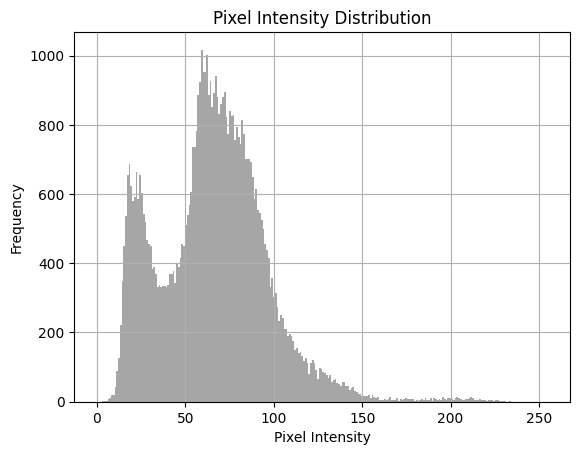

In [47]:
import matplotlib.pyplot as plt

# Plot the histogram of pixel intensities
plt.hist(slot1_gray.ravel(), bins=256, range=(0, 255), color='gray', alpha=0.7)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Task 6 Draw Bounding Boxes:**
* Highlight three parking slots in the original image by drawing rectangles around them. Save the result as highlighted_parking_lot.jpg.

# **Explanation:**

Once all the processing was done, we saved the final versions of the images. These images included the parking slots highlighted with rectangles, and they also showed which slots were occupied or empty.

Result: The final processed image was saved as final_parking_lot.jpg, showing the highlighted parking slots with occupancy information (whether each slot was empty or occupied).

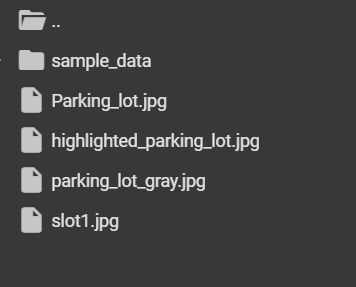

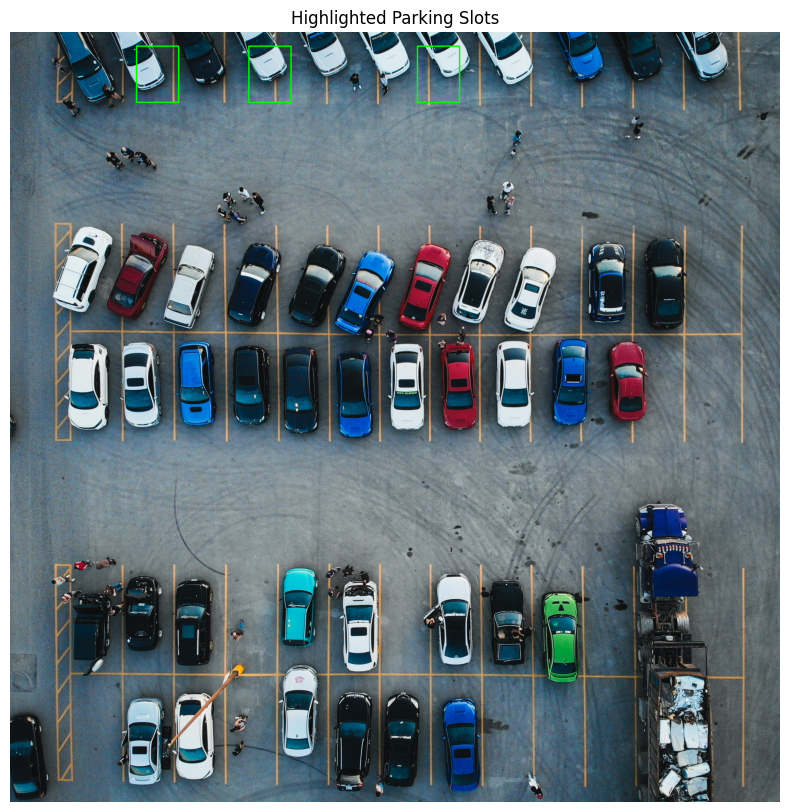

In [ ]:
# Create a copy of the original image to draw rectangles
highlighted_image = parking_lot_image.copy()

# Define rectangles around three parking slots (adjust coordinates for specific slots)
slots = [
    (850, 50, 150, 200),
    (1450, 50, 150, 200),
    (450, 50, 150, 200)
]

# Draw rectangles on the image
for (x, y, w, h) in slots:
    cv2.rectangle(highlighted_image, (x, y), (x+w, y+h), (0, 255, 0), 3)

cv2.imwrite('highlighted_parking_lot.jpg', highlighted_image)

highlighted_image_rgb = cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB)

# Display the highlighted image
plt.figure(figsize=(10, 10))
plt.imshow(highlighted_image_rgb)
plt.title("Highlighted Parking Slots")
plt.axis('off')
plt.show()
